Project - 5: GYM POWER LIFTING

In [2]:
#While working on EDA (Exploratory Data Analysis) projects, we typically follow certain steps. 
#The initial step involves collecting the data.
#Then the task goes on
#Step-1 : Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Step-2: Loading the data
data = pd.read_csv(r"C:\Users\aniketh\Downloads\archive\powerlifting_dataset.csv")

In [5]:
#Step-3: Displaying basic information
data.head() # we get the first five values

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
0,Jessica Wilson,46,59 kg,Bench Press,269
1,John Doe,60,83 kg,Bench Press,179
2,Emily Davis,41,105 kg,Bench Press,235
3,Emily Davis,33,66 kg,Squat,359
4,Laura Taylor,56,74 kg,Deadlift,221


In [6]:
data.tail() # we get the last five values

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
2995,John Doe,46,74 kg,Bench Press,246
2996,Daniel Lee,39,Open,Deadlift,244
2997,Sarah Thomas,62,Open,Squat,148
2998,Chris Brown,32,93 kg,Bench Press,333
2999,Daniel Lee,22,83 kg,Deadlift,280


In [8]:
data.shape # we get the output, containing the data shape, as : (number of rows, number of columns)

(3000, 5)

In [9]:
data.info()#we get the data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lifter Name         3000 non-null   object
 1   Age                 3000 non-null   int64 
 2   Weight Class        3000 non-null   object
 3   Lift Type           3000 non-null   object
 4   Amount Lifted (kg)  3000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


In [10]:
data.describe()#we get the statistical information

,Age,Amount Lifted (kg)
count,3000.000000,3000.000000
mean,41.064000,250.332667
std,13.682628,86.281208
min,18.000000,100.000000
25%,29.000000,176.750000
50%,41.000000,250.000000
75%,53.000000,325.250000
max,64.000000,399.000000


In [11]:
data.isnull()# we get the null values

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2995,False,False,False,False,False
2996,False,False,False,False,False
2997,False,False,False,False,False
2998,False,False,False,False,False


In [15]:
data.isna().sum()#we get the null values as a sum, for better analysis
#we can use 'isnull()' also, they both possess the same output

Lifter Name           0
Age                   0
Weight Class          0
Lift Type             0
Amount Lifted (kg)    0
dtype: int64

In [16]:
#Here we don't have any null values, so we do not have to clean the data 

[[<Axes: title={'center': 'Age'}>
  <Axes: title={'center': 'Amount Lifted (kg)'}>]]
[[<Axes: title={'center': 'Age'}>
  <Axes: title={'center': 'Amount Lifted (kg)'}>]]


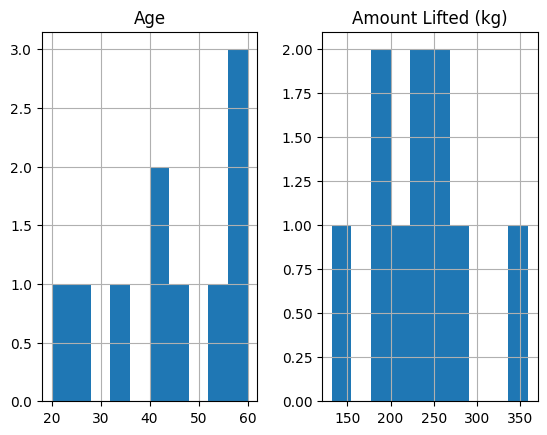

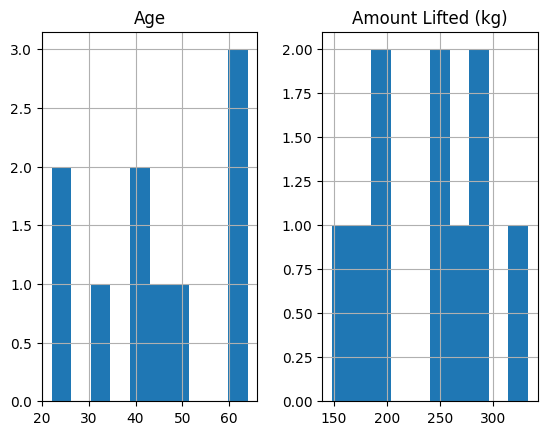

In [24]:
# Step-4 : We will now analyze the data
#1. Getting histogram based on the first 10 values and last 10 values
print(data.head(10).hist())
print(data.tail(10).hist())

Axes(0.125,0.11;0.775x0.77)


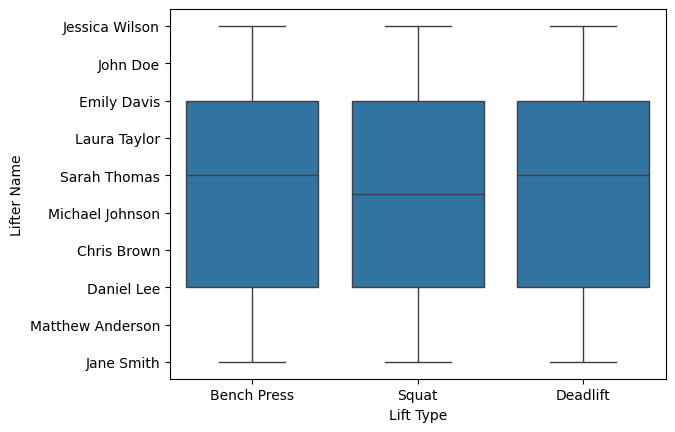

In [27]:
#2. Getting blox plots for lifter names based on the lift types
print(sns.boxplot(x = 'Lift Type', y = 'Lifter Name', data = data )) 

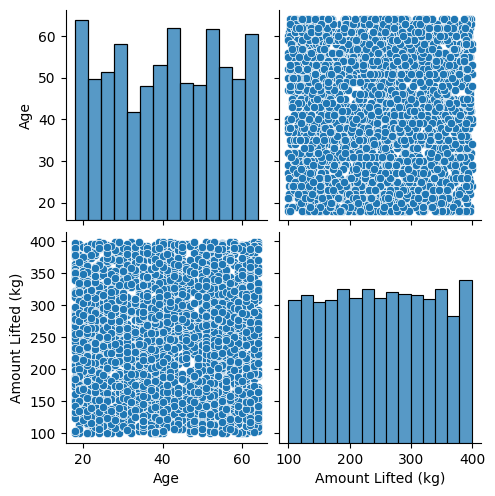

In [28]:
#Step-5 : Visualizing the data
#Pair plots
print(sns.pairplot(data))

<Axes: ylabel='count'>

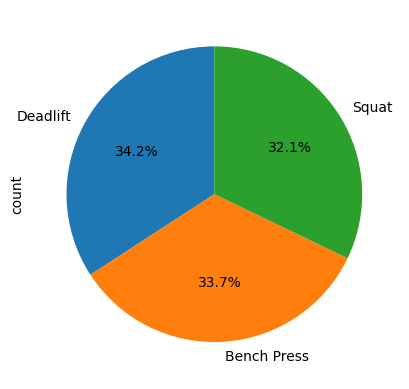

In [34]:
#Pie charts
data['Lift Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)

In [44]:
#Now, moving on to the tasks

In [49]:
#TASK - 1: Top 5 names based on top top lifted weights
highest_weight = data['Amount Lifted (kg)'].max()
# Print the highest weight
print(f"The highest weight lifted is: {highest_weight} kg")
top_5 = data.sort_values(by='Amount Lifted (kg)', ascending=False).head(5)
# Select only the 'Name' and 'Amount Lifted (kg)' columns
result = top_5[['Lifter Name', 'Amount Lifted (kg)']]
print(result)

The highest weight lifted is: 399 kg
           Lifter Name  Amount Lifted (kg)
2778  Matthew Anderson                 399
2758       Emily Davis                 399
2795        Jane Smith                 399
1207   Michael Johnson                 399
2105   Michael Johnson                 399


In [55]:
#TASK - 2: Count of lift types with names 
counts=print(data['Lift Type'].value_counts())

Lift Type
Deadlift       1025
Bench Press    1011
Squat           964
Name: count, dtype: int64


Lifter names with age greater than 50:
1               John Doe
4           Laura Taylor
5           Sarah Thomas
8        Michael Johnson
12      Matthew Anderson
              ...       
2989         Chris Brown
2991            John Doe
2992            John Doe
2994        Sarah Thomas
2997        Sarah Thomas
Name: Lifter Name, Length: 917, dtype: object
Axes(0.125,0.11;0.775x0.77)


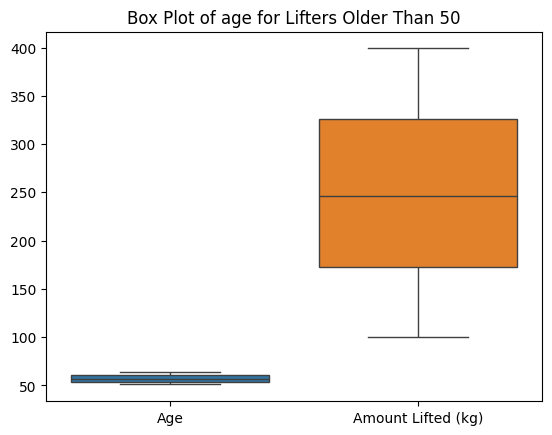

In [62]:
#TASK - 3: Printing the Lifter names of age greater than 50 and box plotting the related data
older_lifters = data[data['Age'] > 50]
print("Lifter names with age greater than 50:")
print(older_lifters['Lifter Name'])
print(sns.boxplot(older_lifters))
plt.title('Box Plot of age for Lifters Older Than 50')
plt.show()

In [71]:
#TASK - 4 : Get the names of lifters whose age is greater than 100
# Ensure 'Weight Class' is numeric (if it's not already)
data['Weight Class'] = pd.to_numeric(data['Weight Class'], errors='coerce')
# Filter lifters with weight greater than 100
w_lifters = data[data['Weight Class'] > 100]
# Check if there are any lifters with weight greater than 100 and print their names
if not w_lifters.empty:
    print("Lifter names with weight greater than 100:")
    print(w_lifters['Lifter Name'])
else:
    print("No lifters found with weight greater than 100.")

No lifters found with weight greater than 100.


In [79]:
#TASK - 5 : Get the names of the people who did only deadlifts
deadlift_lifters = data[data['Lift Type'] == 'Deadlift']
# Get the names of these lifters
deadlift_names = deadlift_lifters['Lifter Name'].unique()
# Print the names
print("Lifter names who performed only deadlifts:")
print(deadlift_names)

Lifter names who performed only deadlifts:
['Laura Taylor' 'Emily Davis' 'Daniel Lee' 'Jane Smith' 'Chris Brown'
 'John Doe' 'Sarah Thomas' 'Jessica Wilson' 'Michael Johnson'
 'Matthew Anderson']
